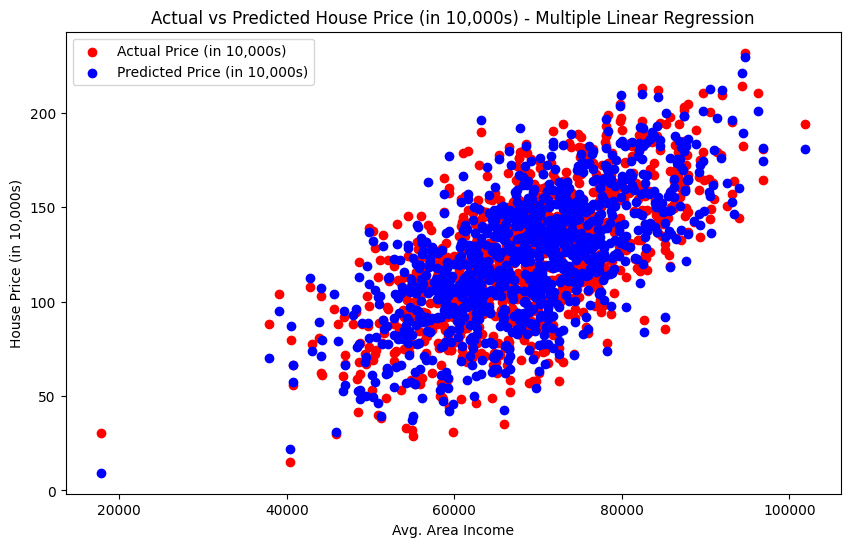

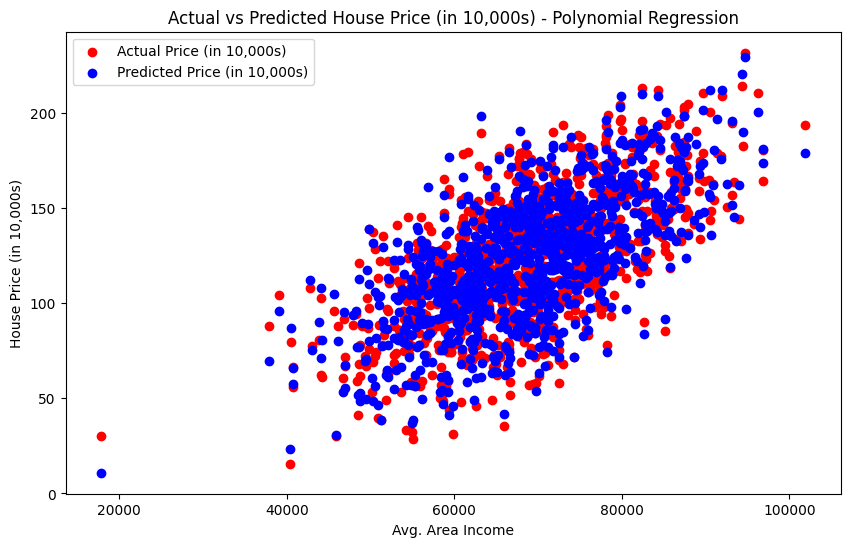

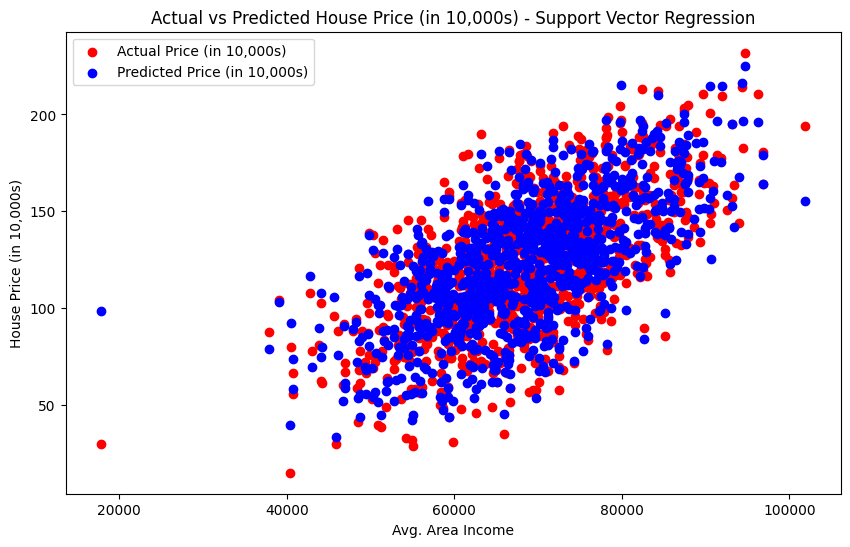

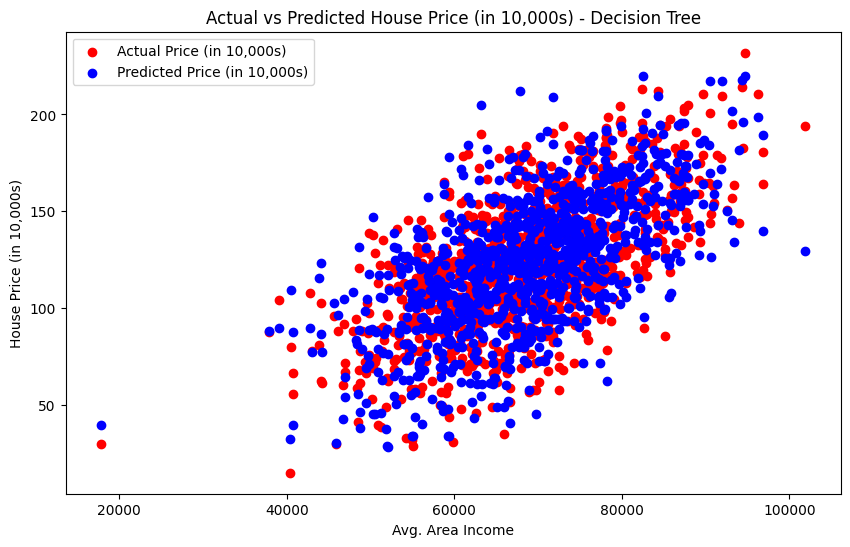

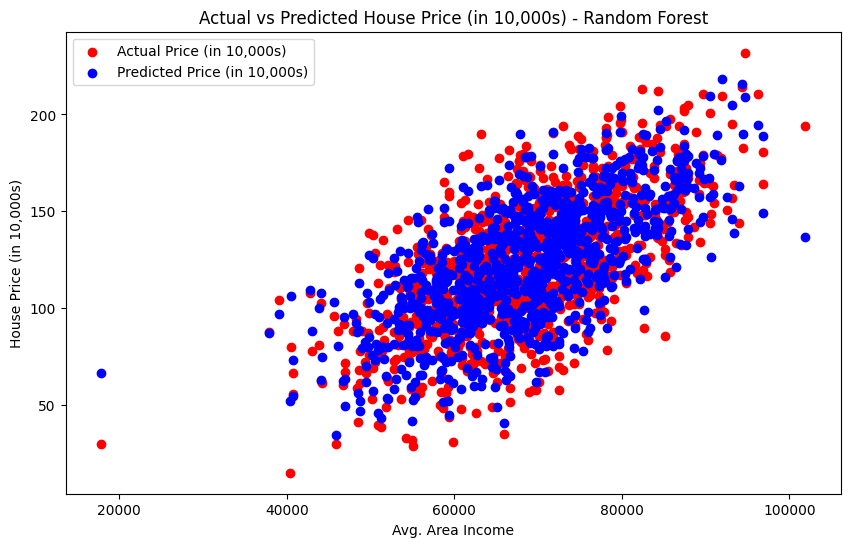

Model: Multiple Linear Regression
R-Squared: 0.9146
Mean Squared Error (in 10,000s): 105.4972
Root Mean Squared Error (in 10,000s): 10.2712
Normalized RMSE (%): 4.7415%
MAPE (%): 7.4801%

Model: Polynomial Regression
R-Squared: 0.9142
Mean Squared Error (in 10,000s): 106.0497
Root Mean Squared Error (in 10,000s): 10.2980
Normalized RMSE (%): 4.7539%
MAPE (%): 7.5046%

Model: Support Vector Regression
R-Squared: 0.9041
Mean Squared Error (in 10,000s): 118.4973
Root Mean Squared Error (in 10,000s): 10.8856
Normalized RMSE (%): 5.0252%
MAPE (%): 8.0678%

Model: Decision Tree
R-Squared: 0.7419
Mean Squared Error (in 10,000s): 319.0479
Root Mean Squared Error (in 10,000s): 17.8619
Normalized RMSE (%): 8.2457%
MAPE (%): 12.9859%

Model: Random Forest
R-Squared: 0.8676
Mean Squared Error (in 10,000s): 163.6663
Root Mean Squared Error (in 10,000s): 12.7932
Normalized RMSE (%): 5.9058%
MAPE (%): 9.5752%



In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import math

# Load the dataset
file_path = 'USA_Housing.csv'  # Replace with your file path
dataset = pd.read_csv(file_path)

# Define features (X) and target (y)
X = dataset.iloc[:, :-2].values  # Exclude 'Price' and 'Address'
y = dataset['Price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize models
linear_regressor = LinearRegression()
poly_features = PolynomialFeatures(degree=2)
svr_regressor = SVR(kernel='rbf')
dt_regressor = DecisionTreeRegressor(random_state=0)
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)

# Train models and make predictions
# Multiple Linear Regression
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

# Polynomial Regression
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
y_pred_poly = poly_regressor.predict(X_poly_test)

# Support Vector Regression (requires feature scaling)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
svr_regressor.fit(X_train_scaled, y_train_scaled)
y_pred_svr = sc_y.inverse_transform(svr_regressor.predict(X_test_scaled).reshape(-1, 1)).ravel()

# Decision Tree
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Random Forest
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

# Convert actual and predicted prices to units of 10,000 for evaluation
y_test_10k = y_test / 10000
predictions_10k = [
    y_pred_linear / 10000,
    y_pred_poly / 10000,
    y_pred_svr / 10000,
    y_pred_dt / 10000,
    y_pred_rf / 10000
]

# Model names
models = ['Multiple Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'Decision Tree', 'Random Forest']

# Plotting scatter plots for each model
X_test_feature = X_test[:, 0]  # Use 'Avg. Area Income' as example feature
for model, y_pred in zip(models, predictions_10k):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_feature, y_test_10k, color='red', label='Actual Price (in 10,000s)')
    plt.scatter(X_test_feature, y_pred, color='blue', label='Predicted Price (in 10,000s)')
    plt.title(f'Actual vs Predicted House Price (in 10,000s) - {model}')
    plt.xlabel('Avg. Area Income')
    plt.ylabel('House Price (in 10,000s)')
    plt.legend()
    plt.show()

# Function to calculate evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    nrmse = (rmse / (max(y_test) - min(y_test))) * 100
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    print(f"Model: {model_name}")
    print(f"R-Squared: {r_squared:.4f}")
    print(f"Mean Squared Error (in 10,000s): {mse:.4f}")
    print(f"Root Mean Squared Error (in 10,000s): {rmse:.4f}")
    print(f"Normalized RMSE (%): {nrmse:.4f}%")
    print(f"MAPE (%): {mape:.4f}%\n")

# Evaluate all models
for model, y_pred in zip(models, predictions_10k):
    evaluate_model(y_test_10k, y_pred, model)
